## Dataset Description:
    The dataset is based on the “Statlog Dataset” from the UCI Machine Learning Repository. 

### Columns of the dataset and their meaning are as follows;

    Age (numeric)
    Sex (text: male, female)
    Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
    Housing (text: own, rent, or free)
    Saving accounts (text - little, moderate, quite rich, rich)
    Checking /Current account (text - little, moderate, rich)
    Credit amount (numeric, in Deutsche Mark)
    Duration (numeric, in month)
    Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others

### Importing library and Reading File

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [21]:
import missingno as msno

In [20]:
from scipy import stats

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [19]:
%matplotlib inline

In [ ]:
pip install fancyimpute

In [7]:
from fancyimpute import KNN

###  1.   Load the dataset into pandas and get a peek at the underlying data in the dataframe.

In [22]:
df = pd.read_csv('german_credit_data.csv')#reading csv file with help of panda

In [10]:
df.head()#insepection of dataset

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [11]:
df.tail()#insepection of dataset

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV
999,999,27,male,2,own,moderate,moderate,4576,45,car


###  2.   Provide the following information about the dataframe;

#### 2.1 Dimensions of the dataframe

In [10]:
df.shape 

(1000, 10)

Number of rows in column : 10

Number of Rows in data : 1000

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Age               1000 non-null   int64   
 1   Sex               1000 non-null   category
 2   Job               1000 non-null   category
 3   Housing           1000 non-null   category
 4   Saving accounts   817 non-null    category
 5   Checking account  606 non-null    category
 6   Credit amount     1000 non-null   int64   
 7   Duration          1000 non-null   int64   
 8   Purpose           1000 non-null   category
dtypes: category(6), int64(3)
memory usage: 30.5 KB


Basic Insight About Given Dataset

1. Duration and Age are discreate data type.
2. Credir ammount is continuous data type.
3. Rest are categorical data type.
4. First column is not giving any insight so removing it in furture.
5. Their are significant null value present in Saving and Checking column.
6. Because it is categorical type of data so it limit our  statistical approach to  handle it.



In [12]:
df.dtypes.value_counts()

object    5
int64     5
dtype: int64

we know that there are only three colus are numerical , rest are catagorical.

In [23]:
df = df.astype({"Sex":'category',"Job":'category',"Housing":'category',"Saving accounts":'category',"Checking account":'category',"Purpose":'category'})

changing into categorical type of data.

In [14]:
df.dtypes

Unnamed: 0             int64
Age                    int64
Sex                 category
Job                 category
Housing             category
Saving accounts     category
Checking account    category
Credit amount          int64
Duration               int64
Purpose             category
dtype: object

In [24]:
df['Job'] = df['Job'].cat.rename_categories({ 0 :'unskilled_non-resident', 1 : 'unskilled_resident', 
                                             2 :'skilled', 3:'highly_skilled'})

for bringing unifromity with rest of dataset changing category name of Job column.

In [25]:
df = df.drop('Unnamed: 0',1) # not needde so droping meaningless column.

#### 2.2 Information about the schema

In [16]:
df.nunique()

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
dtype: int64

so data is rightly skewed.

#### 2.3 Statistical metrics of each column

In [62]:
df.describe(include="all")

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
count,1000.000000,1000,1000,1000,817,606,1000.000000,1000.000000,1000
unique,NaN,2,4,3,4,3,NaN,NaN,8
top,NaN,male,skilled,own,little,little,NaN,NaN,car
freq,NaN,690,630,713,603,274,NaN,NaN,337
mean,35.546000,NaN,NaN,NaN,NaN,NaN,3271.258000,20.903000,NaN
std,11.375469,NaN,NaN,NaN,NaN,NaN,2822.736876,12.058814,NaN
min,19.000000,NaN,NaN,NaN,NaN,NaN,250.000000,4.000000,NaN
25%,27.000000,NaN,NaN,NaN,NaN,NaN,1365.500000,12.000000,NaN
50%,33.000000,NaN,NaN,NaN,NaN,NaN,2319.500000,18.000000,NaN
75%,42.000000,NaN,NaN,NaN,NaN,NaN,3972.250000,24.000000,NaN


| Varriable | Frequent |Precentage  |
| :- | -: | :-: |
| Sex | Male |69%  |
| :- | -: | :-: |
| Job | 2 | 69% |
| :- | -: | :-: |
| Housing | own | 71%
| :- | -: | :-: |
| Saving accounts | little | 60%
| :- | -: | :-: |
| Checking account | little | 27%
| :- | -: | :-: |
|Purpose|car|33%|


|  | Age | Credit Amount | Duration |
|---| --- | --- | --- |
|max| 75 | 18424 | 72 |
|---| --- | --- | --- |
|min| 19 | 250 | 4 |

### 3. Conduct the following data pre-processing steps only as necessary along with the reason behind doing it with suitable steps:

#### 3.1 Missing values

In [94]:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
age_log               0
credit_log            0
duration_log          0
dtype: int64

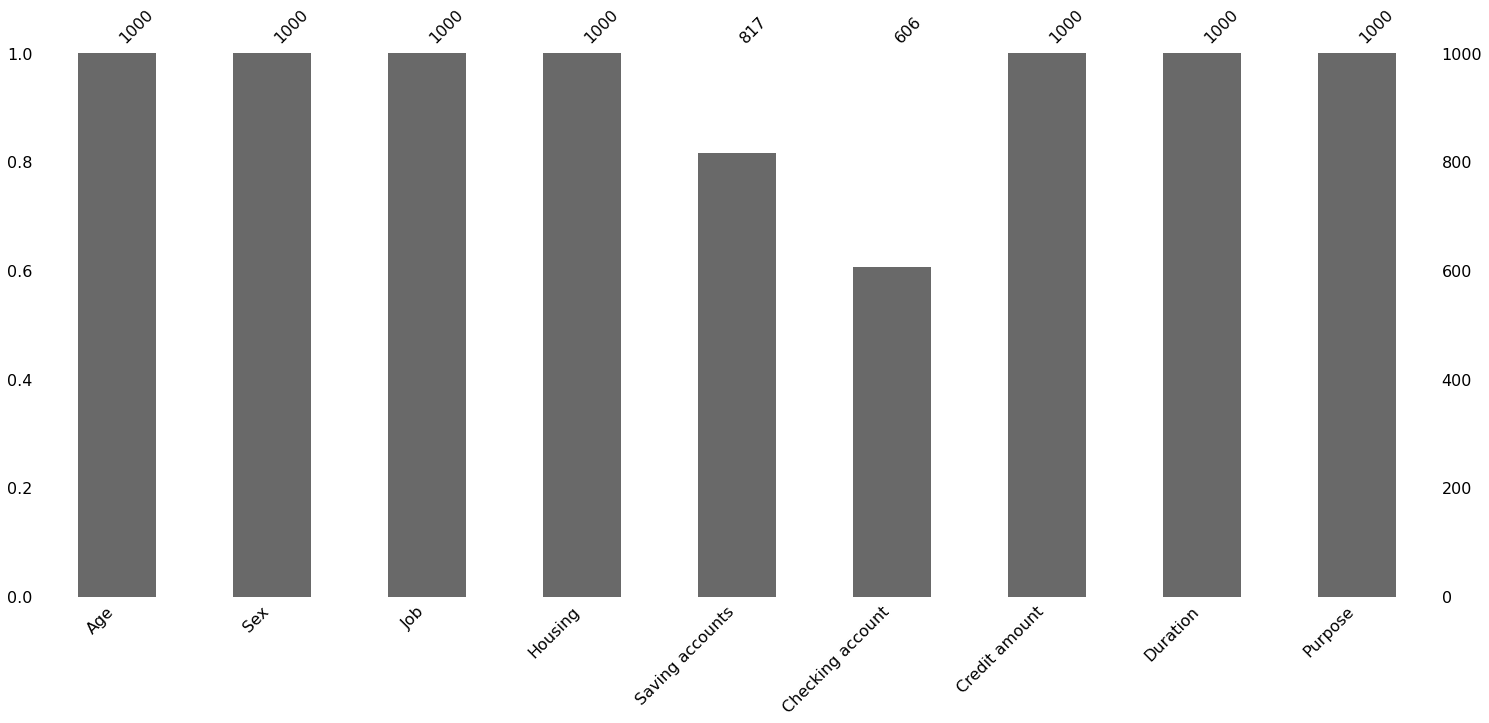

In [65]:
msno.bar(df)

It seems there is lot of missing value present in checking and saving account.The greater possibilty is may be people use one of account in both of them.

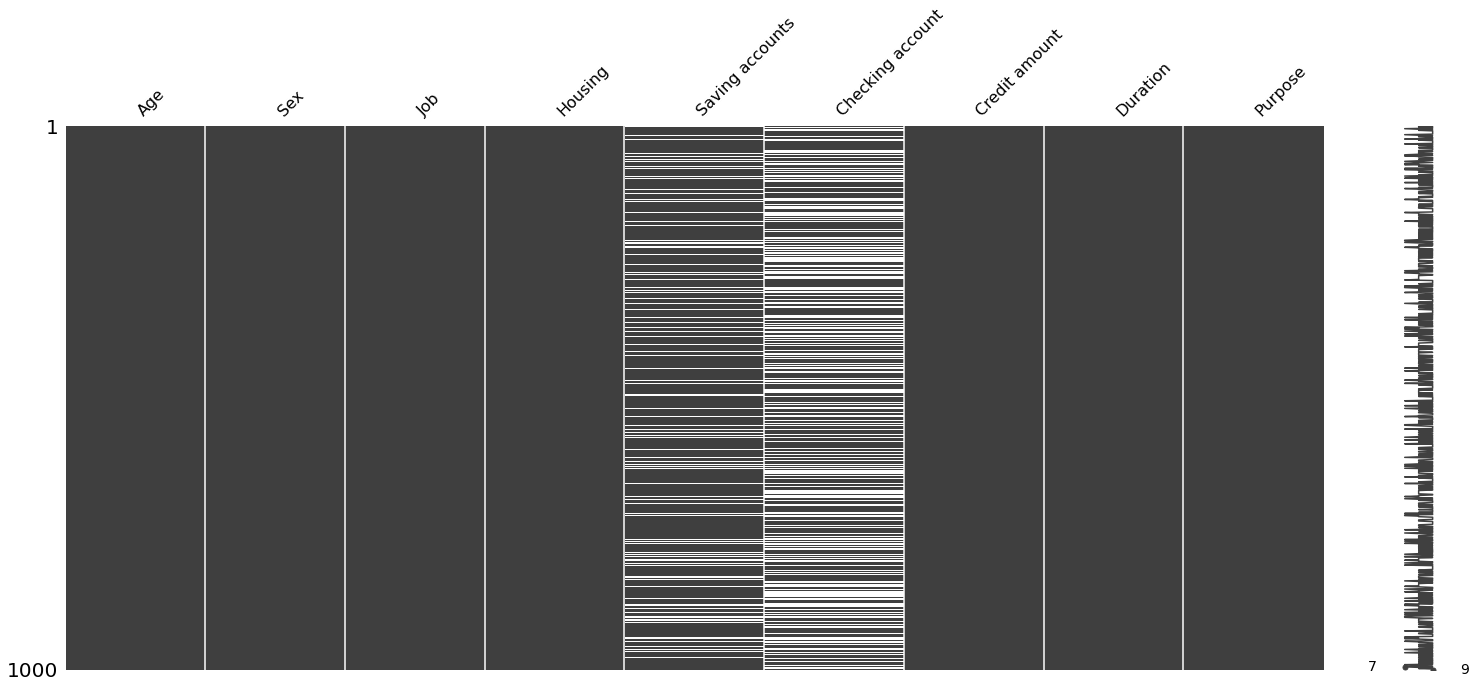

In [66]:
msno.matrix(df)

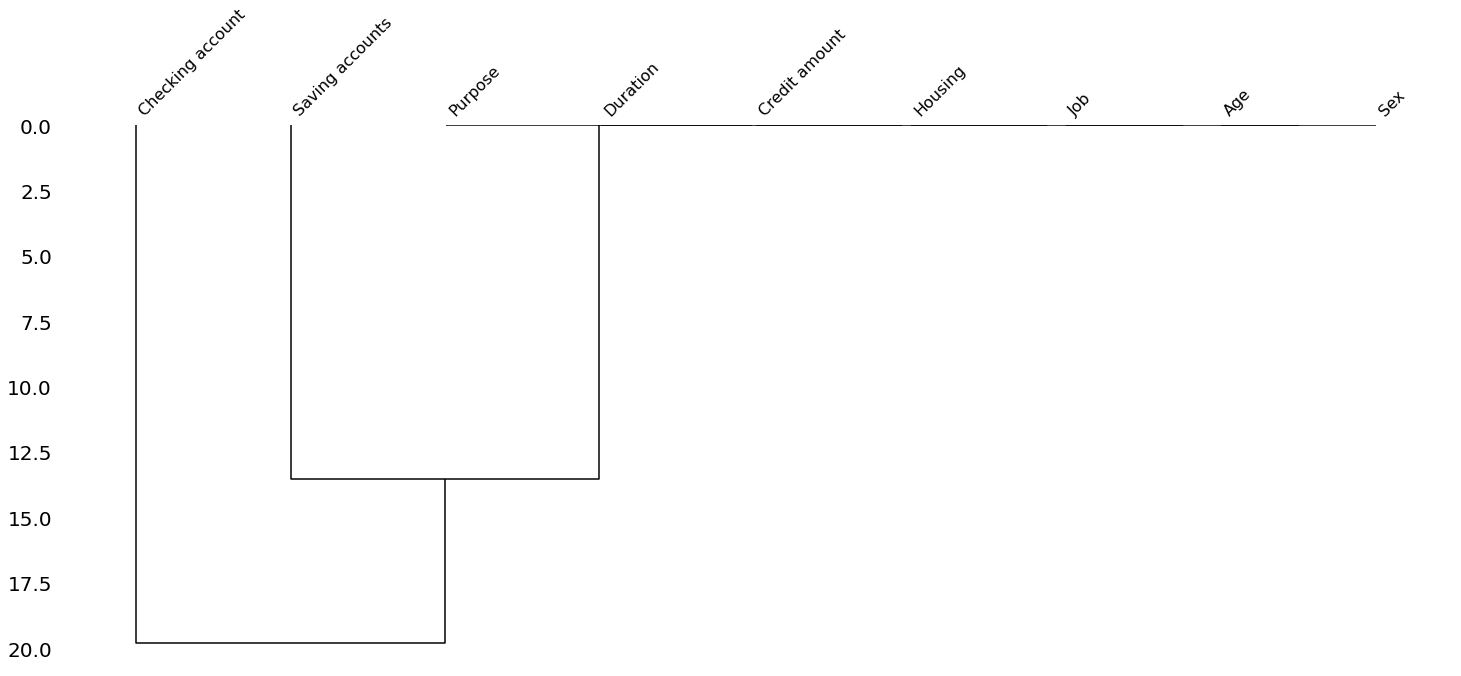

In [67]:
msno.dendrogram(df)

There is no vissible relation between missing values

Inspecting behaviour of null value in dataset step by step:

---
1. Checking number of rows  after removing null values from saving account in control enviorment(droping checking account.)
2. Checking number of rows  after removing null values from checking account in control enviorment(droping saving account)  
3. checking number of rows after complete removal of null values.


In [ ]:
df_full=df.copy(deep=True)
df_full=df_full.dropna()
df_s=df.copy(deep=True)
df_c=df.copy(deep=True)
df_s=df_s.drop(['Checking account'],axis = 1)
df_s=df_s.dropna()#saving acount without missing values
df_c=df_c.drop(['Saving accounts'],axis = 1)
df_c=df_c.dropna()#checking account without missing values

In [ ]:
print(df_full.shape)
print(df_s.shape)
print(df_c.shape)
print(df_all_c.shape)

(522, 12)
(817, 11)
(606, 11)
(1000, 12)


In [ ]:
print('Missiing value in dadtframe with both saving and current account :',(1000 - 522))
print('Missiing value in dadtframe has only saving  account :',(1000-817))
print('Missiing value in dadtframe has only current  account :',(1000-606))
print('Common Misisng Value:', ((394+183)-478))

Missiing value in dadtframe with both saving and current account : 478
Missiing value in dadtframe has only saving  account : 183
Missiing value in dadtframe has only current  account : 394
Common Misisng Value: 99


## IMPUTATAION OF MISSING VALUE BY KNN Method

In [ ]:
df_k1 = df.copy(deep=True)

In [ ]:
df_k1.iloc[:,:] = knn_imppu.fit_transform(df_k1)

In [ ]:
df['Saving accounts'].unique()

[NaN, 'little', 'quite rich', 'rich', 'moderate']
Categories (4, object): ['little', 'quite rich', 'rich', 'moderate']

In [ ]:
df['Job'].value_counts()

skilled                   630
unskilled_resident        200
highly_skilled            148
unskilled_non-resident     22
Name: Job, dtype: int64

In [ ]:
df['Checking account'].value_counts()

little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

In [ ]:
df_gp=df.groupby('Housing')

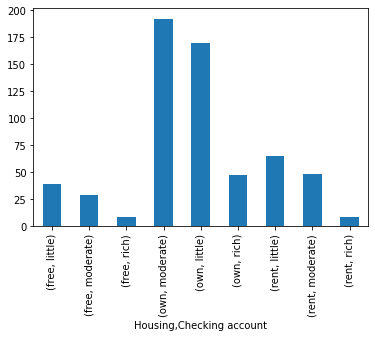

In [ ]:
df_gp['Checking account'].value_counts().plot(kind='bar')

Peciular pattern here people who own house has mojority time has moderate and little type in checking account.

In [ ]:
df_gp=df.groupby('Housing')

In [ ]:
kl = df_gp['Saving accounts'].value_counts()

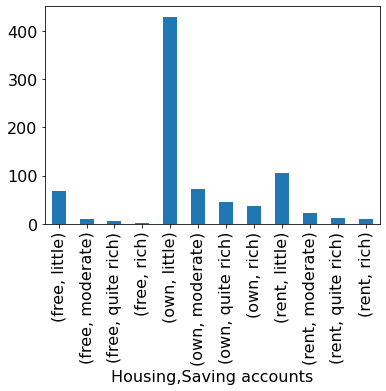

In [ ]:
df_gp['Saving accounts'].value_counts(sort=False).plot(kind='bar')

Peciular pattern here people who own house has mojority time has moderate and little type in saving account.More skewed towards own and little.

In [ ]:
df#using google colab interactive table to futher inverstigate my finding.By using filter  

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,age_log,credit_log,duration_log
0,67,male,skilled,own,NaN,little,1169,6,radio/TV,4.204693,7.063904,1.791759
1,22,female,skilled,own,little,moderate,5951,48,radio/TV,3.091042,8.691315,3.871201
2,49,male,unskilled_resident,own,little,NaN,2096,12,education,3.891820,7.647786,2.484907
3,45,male,skilled,free,little,little,7882,42,furniture/equipment,3.806662,8.972337,3.737670
4,53,male,skilled,free,little,little,4870,24,car,3.970292,8.490849,3.178054
...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,female,unskilled_resident,own,little,NaN,1736,12,furniture/equipment,3.433987,7.459339,2.484907
996,40,male,highly_skilled,own,little,little,3857,30,car,3.688879,8.257645,3.401197
997,38,male,skilled,own,little,NaN,804,12,radio/TV,3.637586,6.689599,2.484907
998,23,male,skilled,free,little,little,1845,45,radio/TV,3.135494,7.520235,3.806662


Making of dummy varriable for further analysis and imputation using KNN method for imputation by using fancyimpute library.

In [ ]:

df5 = df.copy()# copying a dataset
df5['Job'] = df5['Job'].cat.rename_categories({'unskilled_non-resident': 0, 'unskilled_resident' : 1, 'skilled' : 2, 'highly_skilled' : 3})
df5['Saving accounts'] = df5['Saving accounts'].cat.rename_categories({'little': 0, 'moderate' : 1, 'quite rich' : 2, 'rich' : 3})
df5['Checking account'] = df5['Checking account'].cat.rename_categories({'little': 0, 'moderate' : 1, 'rich' : 2})
df5['Housing'] = df5['Housing'].cat.rename_categories({'own': 0, 'rent' : 1, 'free' : 2})
df5['Sex'] = df5['Sex'].cat.rename_categories({'male': 0, 'female' : 1 })
df5['Purpose'] = df5['Purpose'].cat.rename_categories({'car': 0, 'radio/TV' : 1, 'furniture/equipment': 2,'business': 3,'education': 4,'repairs': 5, 'vacation/others': 6,'domestic appliances':7  })

In [ ]:
df6=df5.copy(deep=True)
# importing the KNN from fancyimpute library
from sklearn.impute import KNNImputer
# calling the KNN class
knn_imputer = KNNImputer(n_neighbors=10)
# imputing the missing value with knn imputer
df6[['Saving accounts', 'Checking account']] = knn_imputer.fit_transform(df6[['Saving accounts', 'Checking account']])

In [ ]:
df6["Saving accounts"].value_counts()

 0.000000e+00    603
-9.223372e+18    183
 1.000000e+00    103
 2.000000e+00     63
 3.000000e+00     48
Name: Saving accounts, dtype: int64

Not getting a desired result from KNN method.Giving an extra varriable.Try to change neighbhour. 

In [ ]:
df7=df5.copy(deep=True)
# importing the KNN from fancyimpute library
from sklearn.impute import KNNImputer
# calling the KNN class
knn_imputer = KNNImputer(n_neighbors=120)
# imputing the missing value with knn imputer
df7[['Saving accounts', 'Checking account']] = knn_imputer.fit_transform(df7[['Saving accounts', 'Checking account']])

In [ ]:
df7["Saving accounts"].value_counts()

 0.000000e+00    603
-9.223372e+18    183
 1.000000e+00    103
 2.000000e+00     63
 3.000000e+00     48
Name: Saving accounts, dtype: int64

After changing , neighbhour number still getting same result.So going with missing value for further analysis.

#### 3.1 Erroneous/wrong values

#### 3.1 Skewed data

Text(0, 0.5, 'Duration')

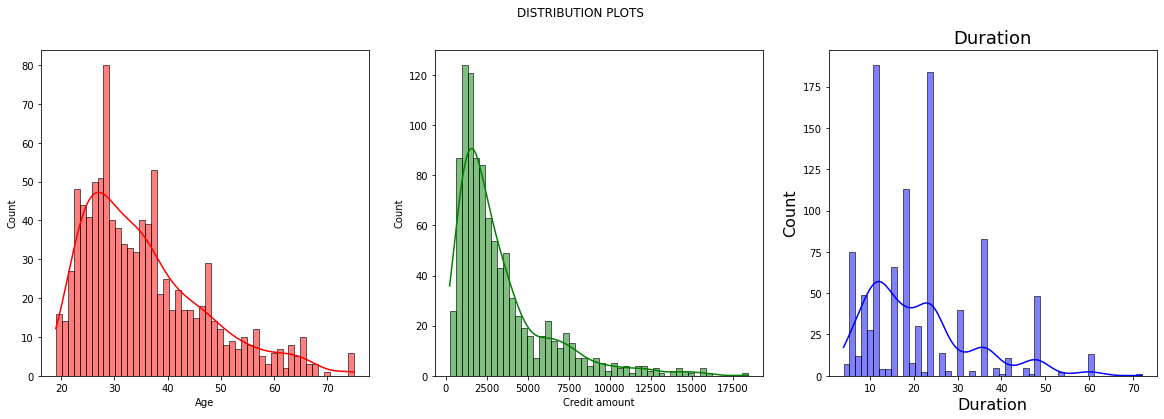

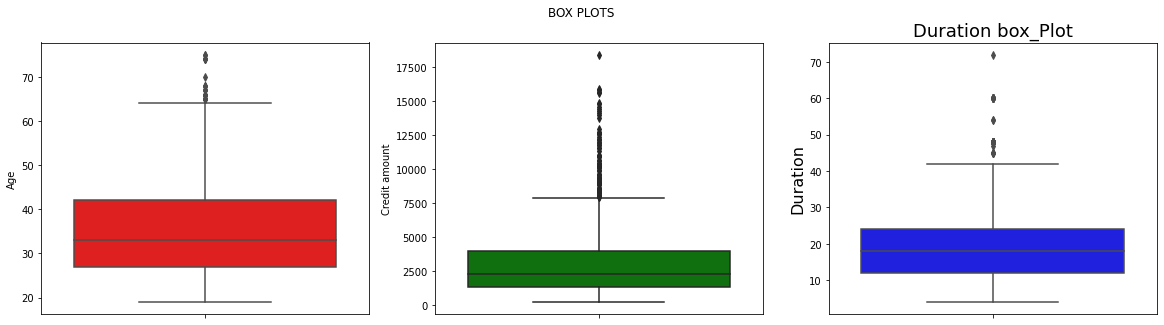

In [68]:
fig, ax = plt.subplots(1,3,figsize=(20,6))
plt.suptitle('DISTRIBUTION PLOTS')
# Histogram Plot for distribution and skewness
sns.histplot(df['Age'], kde=True, color='red', bins=50,ax=ax[0]) #Age
plt.title('Age Distribution', fontsize=18)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Count', fontsize=16)

sns.histplot(df['Credit amount'], kde=True, color='green', bins=50,ax=ax[1]) #Credit amount 
plt.title('Credit amount', fontsize=18)
plt.xlabel('Credit amount', fontsize=16)
plt.ylabel('Count', fontsize=16)

sns.histplot(df['Duration'], kde=True, color='blue', bins=50,ax=ax[2])#Duration
plt.title('Duration', fontsize=18)
plt.xlabel('Duration', fontsize=16)
plt.ylabel('Count', fontsize=16)

# Box Plot for 5-point summary , distribution and outliers

fig, ax = plt.subplots(1,3,figsize=(20,5))
plt.suptitle('BOX PLOTS')

sns.boxplot(data = df ,y=df['Age'], color='red',ax=ax[0]) #Age
plt.title('Age box_Plot', fontsize=18)
plt.ylabel('Age', fontsize=16)

sns.boxplot(data = df ,y=df['Credit amount'], color='green',ax=ax[1]) #Credit amount 
plt.title('Credit box_Plot', fontsize=18)
plt.ylabel('Credit', fontsize=16)

sns.boxplot(data = df ,y=df['Duration'], color='blue',ax=ax[2]) #Duration
plt.title('Duration box_Plot', fontsize=18)
plt.ylabel('Duration', fontsize=16)

As we can see above data is right skewed and also have outliers.The median is the most informative measure of central tendency for skewed distributions or distributions with outliers.

In [69]:
df.skew()#indvidual skew for esch numerical column

Age              1.020739
Credit amount    1.949628
Duration         1.094184
dtype: float64

we know that if  skewness is less than -1 or greater than 1, the distribution is highly skewed.So above value shoe data is highlt skewed.

##### Try to make numerical varriable normal distibuate with help  of log transformation.

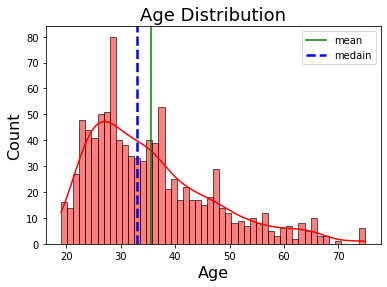

In [70]:
sns.histplot(df['Age'], kde=True, color='red', bins=50)
plt.title('Age Distribution', fontsize=18)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.axvline(x=df.Age.mean(),color='green',label='mean')
plt.axvline(x=df.Age.median(),color='blue',ls='--',lw=2.5,label='medain')
plt.legend()

In [26]:
df['age_log']=np.log(df['Age'])#log transformation

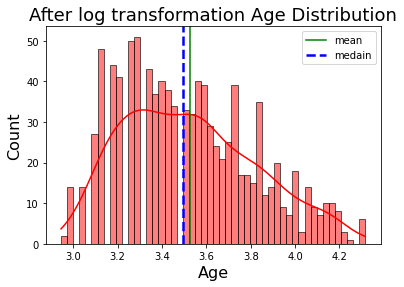

In [72]:
sns.histplot(df['age_log'], kde=True, color='red', bins=50)
plt.title('After log transformation Age Distribution', fontsize=18)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.axvline(x=df.age_log.mean(),color='green',label='mean')
plt.axvline(x=df.age_log.median(),color='blue',ls='--',lw=2.5,label='medain')
plt.legend()

Now we can see that age beacme more normally distribute after using log transformation as compare to earlier.

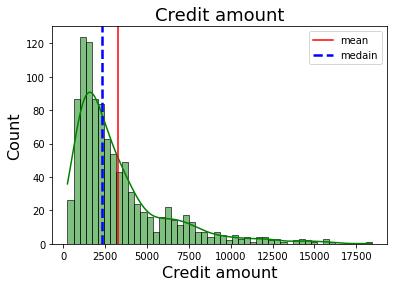

In [73]:
sns.histplot(df['Credit amount'], kde=True, color='green', bins=50)
plt.title('Credit amount', fontsize=18)
plt.xlabel('Credit amount', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.axvline(x=df['Credit amount'].mean(),color='red',label='mean')
plt.axvline(x=df['Credit amount'].median(),color='blue',ls='--',lw=2.5,label='medain')
plt.legend()

In [27]:
df['credit_log']=np.log(df['Credit amount'])#log transformation

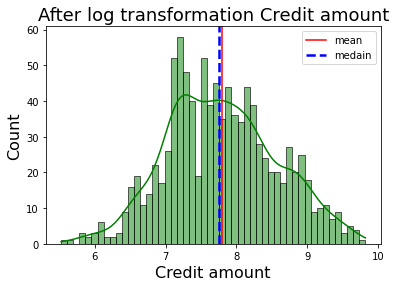

In [75]:
sns.histplot(df['credit_log'], kde=True, color='green', bins=50)
plt.title('After log transformation Credit amount', fontsize=18)
plt.xlabel('Credit amount', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.axvline(x=df['credit_log'].mean(),color='red',label='mean')
plt.axvline(x=df['credit_log'].median(),color='blue',ls='--',lw=2.5,label='medain')
plt.legend()

Now we can see that credit amount beacme more normally distribute after using log transformation as compare to earlier.

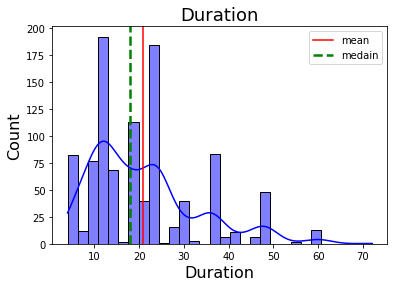

In [76]:
sns.histplot(df['Duration'], kde=True, color='blue', bins=30)
plt.title('Duration', fontsize=18)
plt.xlabel('Duration', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.axvline(x=df['Duration'].mean(),color='red',label='mean')
plt.axvline(x=df['Duration'].median(),color='green',ls='--',lw=2.5,label='medain')
plt.legend()

comparaing both mean and medain for numerical varriable fpr refrence.

In [28]:
df['duration_log']=np.log(df['Duration'])#log transformation

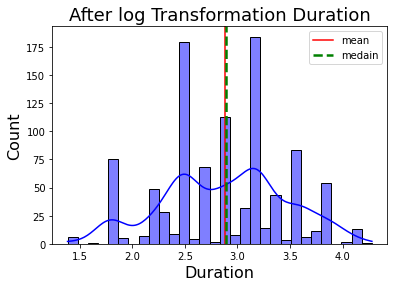

In [78]:
sns.histplot(df['duration_log'], kde=True, color='blue', bins=30)
plt.title('After log Transformation Duration', fontsize=18)
plt.xlabel('Duration', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.axvline(x=df['duration_log'].mean(),color='red',label='mean')
plt.axvline(x=df['duration_log'].median(),color='green',ls='--',lw=2.5,label='medain')
plt.legend()

Now we can see that duration beacme more normally distribute after using log transformation as compare to earlier.

So, as we see with the help of log transformation we have made all numerical varriablr near to normal distribution.Both medain and mean near to eauall.

#### Box plot for outlier.

Text(0, 0.5, 'Age')

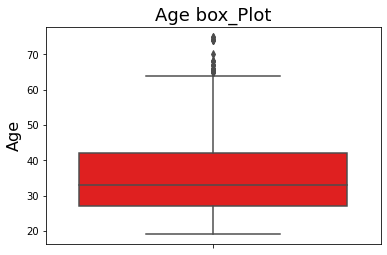

In [79]:
sns.boxplot(data = df ,y=df['Age'], color='red')
plt.title('Age box_Plot', fontsize=18)
plt.ylabel('Age', fontsize=16)

Text(0, 0.5, 'Age')

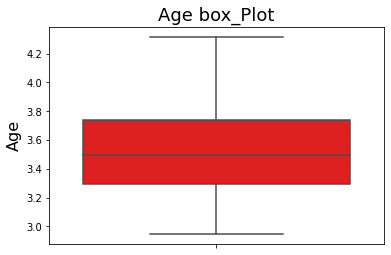

In [80]:
sns.boxplot(data = df ,y=df['age_log'], color='red')
plt.title('Age box_Plot', fontsize=18)
plt.ylabel('Age', fontsize=16)

Text(0, 0.5, 'Credit')

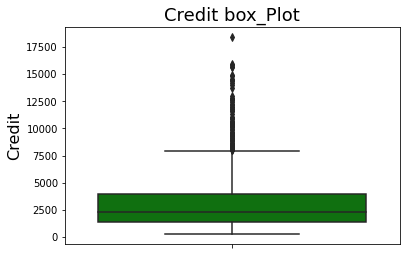

In [81]:
sns.boxplot(data = df ,y=df['Credit amount'], color='green')
plt.title('Credit box_Plot', fontsize=18)
plt.ylabel('Credit', fontsize=16)

Text(0, 0.5, 'Credit')

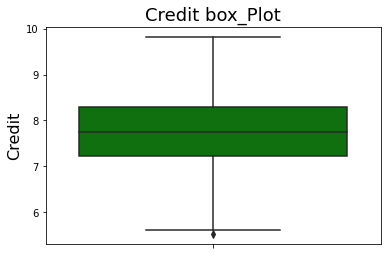

In [82]:
sns.boxplot(data = df ,y=df['credit_log'], color='green')
plt.title('Credit box_Plot', fontsize=18)
plt.ylabel('Credit', fontsize=16)

Text(0, 0.5, 'Duration')

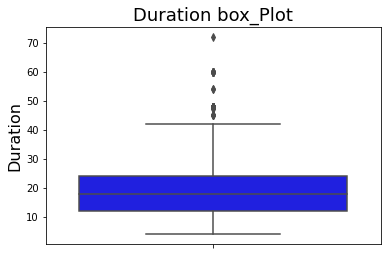

In [83]:
sns.boxplot(data = df ,y=df['Duration'], color='blue')
plt.title('Duration box_Plot', fontsize=18)
plt.ylabel('Duration', fontsize=16)

Text(0, 0.5, 'Duration')

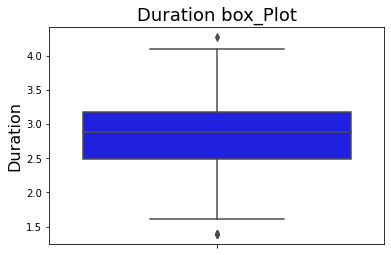

In [84]:
sns.boxplot(data = df ,y=df['duration_log'], color='blue')
plt.title('Duration box_Plot', fontsize=18)
plt.ylabel('Duration', fontsize=16)

we can see clear differnce between transformed and non transformed varriable.Their is totaly absence of outliers after log tansfromation approx to each varriable.

#### 3.1 Outliers

With help of z-score

In [85]:
z =np.abs(stats.zscore(df['Age'])) # Age
threshold = 3
print(np.where(z>3))
threshold = -3
print(np.where(z < -3))

(array([163, 186, 330, 430, 536, 606, 756]),)
(array([], dtype=int64),)


In [86]:
z1 =np.abs(stats.zscore(df['Credit amount'])) #Credit amount 

threshold = 3
print(np.where(z1>3))

threshold = -3
print(np.where(z1 < -3))

(array([ 18,  63,  87,  95, 105, 236, 272, 274, 373, 374, 378, 381, 395,
       563, 615, 637, 714, 744, 763, 818, 832, 887, 915, 917, 921]),)
(array([], dtype=int64),)


In [87]:
z2 =np.abs(stats.zscore(df['Duration']))#Duration

threshold = 3
print(np.where(z2>3))

threshold = -3
print(np.where(z2 < -3))

(array([ 29, 134, 255, 332, 373, 374, 616, 637, 672, 677, 685, 714, 938,
       973]),)
(array([], dtype=int64),)


With help of IQR

In [88]:
Q1 = np.percentile(df['Age'], 25,interpolation = 'midpoint')# Age
Q2 = np.percentile(df['Age'], 50,interpolation = 'midpoint')
Q3 = np.percentile(df['Age'], 75,interpolation = 'midpoint')

IQR = Q3 - Q1
print(IQR)

upper = Q3 +1.5*IQR
lower = Q1 - 1.5*IQR
print(lower)
print(upper)

outlier = []
for x in df['Age']:
    if (x>upper) or (x<lower):
        outlier.append(x)

print(outlier)

15.0
4.5
64.5
[67, 66, 66, 70, 65, 74, 68, 66, 75, 74, 65, 75, 67, 74, 65, 66, 74, 66, 67, 65, 68, 65, 68]


In [89]:
Q11 = np.percentile(df['Credit amount'], 25,interpolation = 'midpoint')#Credit amount 
Q21 = np.percentile(df['Credit amount'], 50,interpolation = 'midpoint')
Q31 = np.percentile(df['Credit amount'], 75,interpolation = 'midpoint')

IQR1 = Q3 - Q1
IQR

upper1 = Q31 +1.5*IQR
lower1 = Q11 - 1.5*IQR
print(lower1)
print(upper1)

outlier1 = []
for x in df['Credit amount']:
    if (x>upper1) or (x<lower1):
        outlier1.append(x)

print(outlier1)

1342.5
3995.0
[1169, 5951, 7882, 4870, 9055, 6948, 5234, 1295, 4308, 1199, 1282, 8072, 12579, 426, 409, 6836, 4020, 5866, 1264, 4746, 6110, 1225, 458, 1158, 6204, 6187, 6143, 7228, 5965, 1262, 783, 6468, 9566, 6229, 14421, 5190, 1007, 8133, 730, 1164, 5954, 4771, 9436, 5943, 1213, 1295, 12612, 1108, 618, 797, 1318, 15945, 7057, 932, 11938, 6458, 6078, 7721, 392, 6260, 7855, 7174, 4281, 781, 701, 639, 8487, 6887, 10144, 1240, 8613, 766, 709, 4795, 860, 682, 5371, 5848, 7758, 6967, 1282, 1288, 339, 1055, 1262, 7308, 909, 1131, 950, 763, 7485, 338, 571, 9572, 4455, 884, 5129, 1175, 674, 4591, 951, 4297, 936, 1168, 5117, 902, 10623, 6568, 5293, 932, 625, 1200, 707, 4657, 10961, 7865, 4210, 866, 14555, 1291, 915, 4605, 1185, 1258, 717, 1204, 433, 666, 4151, 7418, 1154, 5302, 1231, 802, 6304, 8978, 999, 12169, 11998, 1262, 4611, 10722, 4788, 7582, 1092, 1024, 1076, 9398, 6419, 4796, 7629, 9960, 4675, 1287, 672, 1038, 10127, 4811, 727, 1237, 276, 5381, 5511, 685, 708, 4351, 701, 4249, 1028, 5

In [90]:
Q12 = np.percentile(df['Duration'], 25,interpolation = 'midpoint')#Duration
Q22 = np.percentile(df['Duration'], 50,interpolation = 'midpoint')
Q32 = np.percentile(df['Duration'], 75,interpolation = 'midpoint')

IQR2 = Q32 - Q12
IQR2

upper2 = Q32 +1.5*IQR
lower2 = Q12 - 1.5*IQR
print(lower2)
print(upper2)

outlier2 = []
for x in df['Duration']:
    if (x>upper2) or (x<lower2):
        outlier2.append(x)

print(outlier2)

-10.5
46.5
[48, 48, 60, 48, 48, 48, 54, 54, 48, 48, 60, 48, 48, 48, 48, 60, 48, 48, 47, 48, 48, 48, 48, 48, 48, 60, 48, 60, 60, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 60, 48, 60, 48, 48, 48, 60, 72, 60, 48, 48, 60, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 60, 48, 60, 48]


#### Distribution of numerical variables

Text(0.5, 1.0, 'Age Distribution')

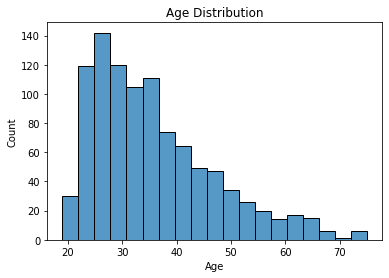

In [ ]:
age = df['Age']
sns.histplot(age)
plt.title("Age Distribution")

so data is rightly skewed.

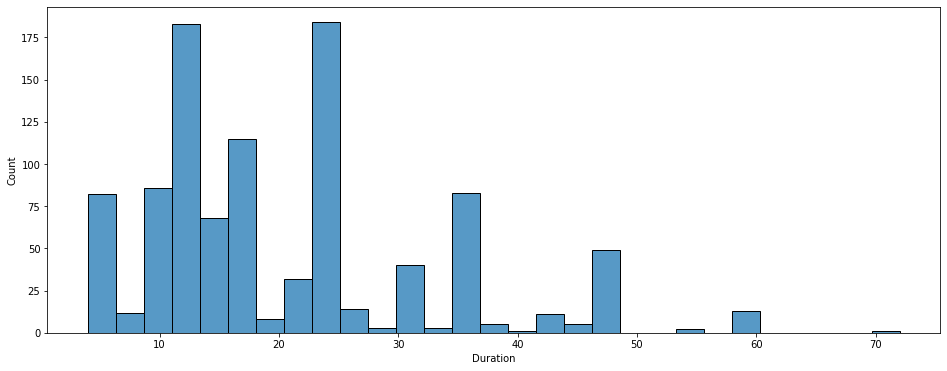

In [17]:
duration = df['Duration']
plt.figure(figsize=(16, 6))
sns.histplot(x= duration ,data =df)

#### Distribution of categorical variables

<Figure size 576x288 with 0 Axes>

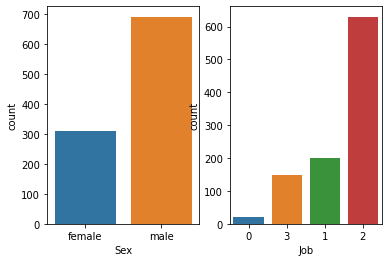

In [ ]:
plt.figure(figsize=(8, 4))
f, axes = plt.subplots(1, 2)
sex = df['Sex']
sns.countplot(x= sex ,data =df,orient='v', ax=axes[0])#box plot fot sex column
job = df['Job']
sns.countplot(x= job ,data =df,order=job.value_counts().sort_values().index,orient='v', ax=axes[1])#box plot fot job column

Observation

---
1. Male  more in number as compare to female.
2. Skill person is dominating in a job type.


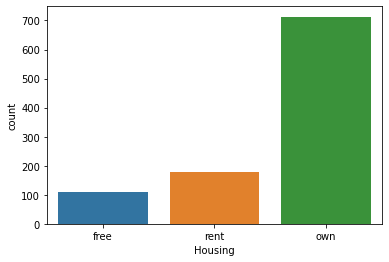

In [ ]:
housing = df['Housing']
sns.countplot(x= housing ,data =df,order=housing.value_counts().sort_values().index)

Observation

---
1. Maxmium number of people owned their house.
2. It also has correlation with missing value.Need of further study.


<Figure size 288x216 with 0 Axes>

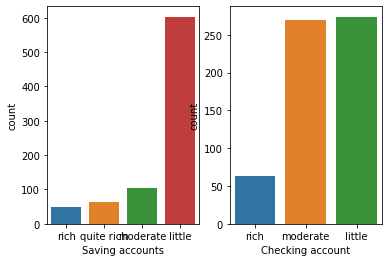

In [ ]:
plt.figure(figsize=(4, 3))
f, axes = plt.subplots(1, 2)
save = df['Saving accounts']
sns.countplot(x= save ,data =df,order=save.value_counts().sort_values().index,orient='v', ax=axes[0])
check = df['Checking account']
sns.countplot(x= check ,data =df,order=check.value_counts().sort_values().index,orient='v', ax=axes[1])

Observation

---
1. As we see poor people is dominationg in both saving and current account.
2. Checking account contain same number of moderate also as compare to saving account which is dominated by one type. 


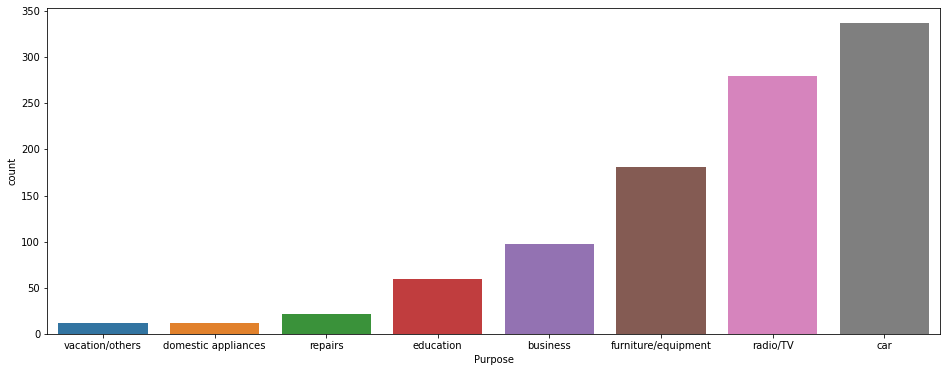

In [ ]:
purpose = df['Purpose']
plt.figure(figsize=(16, 6))
sns.countplot(x= purpose ,data =df,order=purpose.value_counts().sort_values().index)

Observation

---
1. Maxmium people takin loan for car.
2. top three category dominating are:
           1.Car
           2.radio/TV
           3.Furniture/Euipment

#### Numerical vs Categorical plots

Text(0.5, 1.0, 'age and Housing')

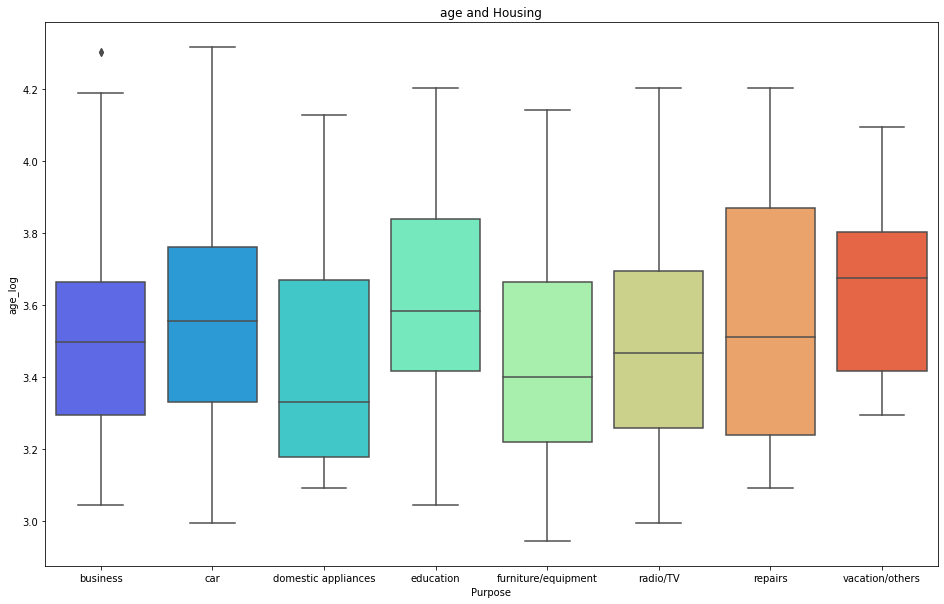

In [30]:
plt.figure(figsize=(16,10))
sns.boxplot(x='Purpose',y='age_log',data=df, palette='rainbow')
plt.title("age and Housing")

Observation

---

Nothing special here.

Text(0.5, 1.0, 'Duration and Purpose')

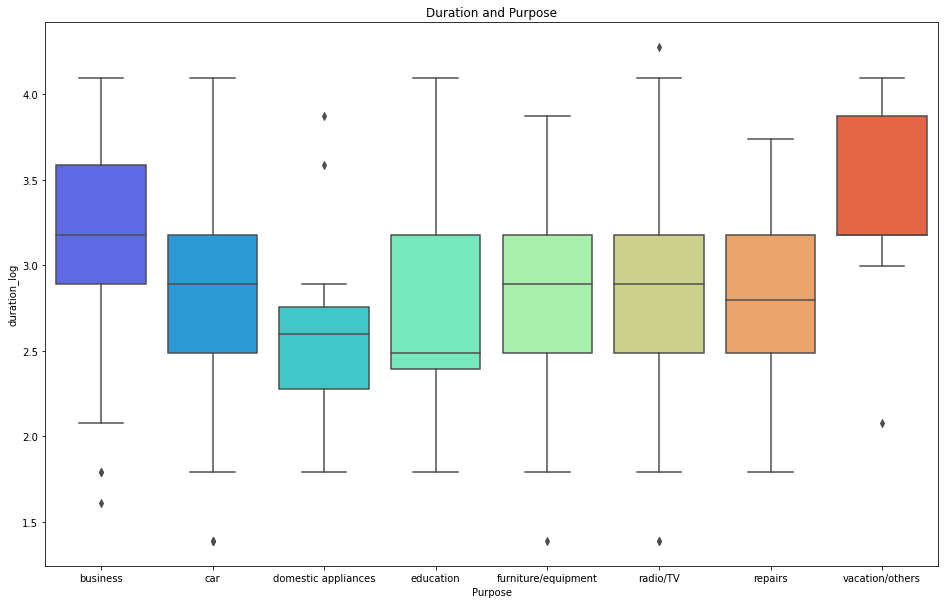

In [31]:
plt.figure(figsize=(16,10))
sns.boxplot(x='Purpose',y='duration_log',data=df, palette='rainbow')
plt.title("Duration and Purpose")

Text(0.5, 1.0, 'Age by Housing')

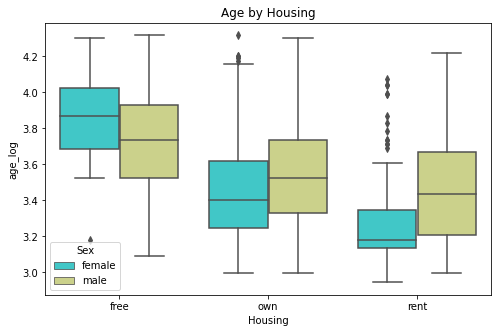

In [32]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Housing',y='age_log',data=df, palette='rainbow',hue='Sex')
plt.title("Age by Housing")

Text(0.5, 1.0, 'Job and Age')

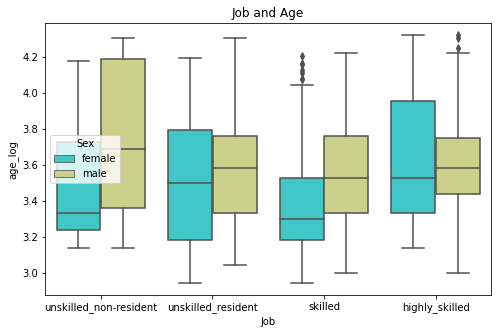

In [34]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Job',y='age_log',data=df, palette='rainbow',hue='Sex')
plt.title("Job and Age")

Text(0.5, 1.0, 'Job and Age')

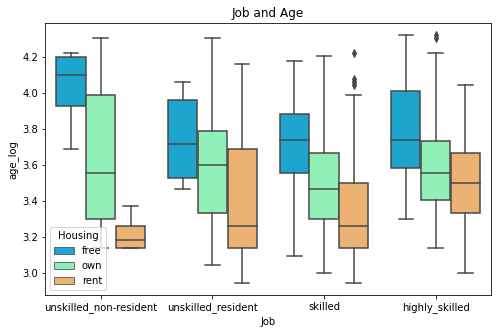

In [35]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Job',y='age_log',data=df, palette='rainbow',hue='Housing')
plt.title("Job and Age")

Text(0.5, 1.0, 'Saving account and sex')

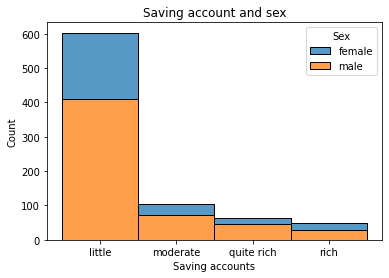

In [40]:
sns.histplot(binwidth=0.5, x="Saving accounts", hue="Sex", data=df, stat="count", multiple="stack")
plt.title("Saving account and sex")

Text(0.5, 1.0, 'checking account and sex')

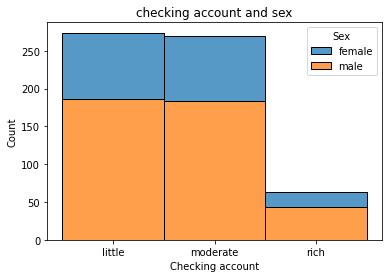

In [41]:
sns.histplot(binwidth=0.5, x="Checking account", hue="Sex", data=df, stat="count", multiple="stack")
plt.title("checking account and sex")

Text(0.5, 1.0, 'checking account and saving account')

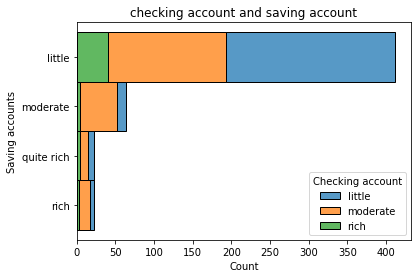

In [42]:
sns.histplot(binwidth=0.5, hue="Checking account", y="Saving accounts", data=df, stat="count", multiple="stack")
plt.title("checking account and saving account")

Text(0.5, 1.0, 'purpose and sex')

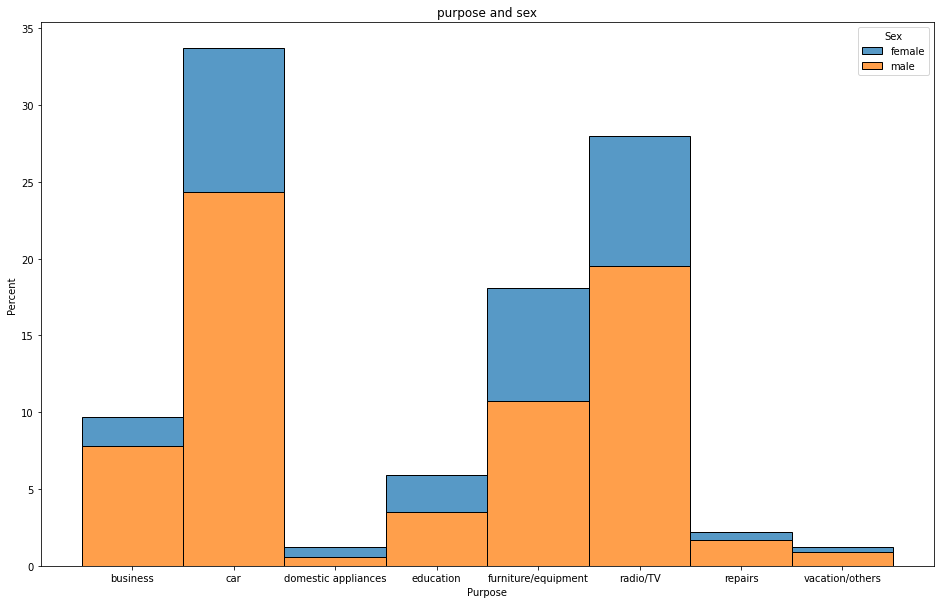

In [44]:
plt.figure(figsize=(16,10))
sns.histplot(binwidth=0.5, x="Purpose", hue="Sex", data=df, stat="percent", multiple="stack")
plt.title("purpose and sex")

#### Numerical vs Numerical plots

Text(0.5, 1.0, 'credit amount and duration')

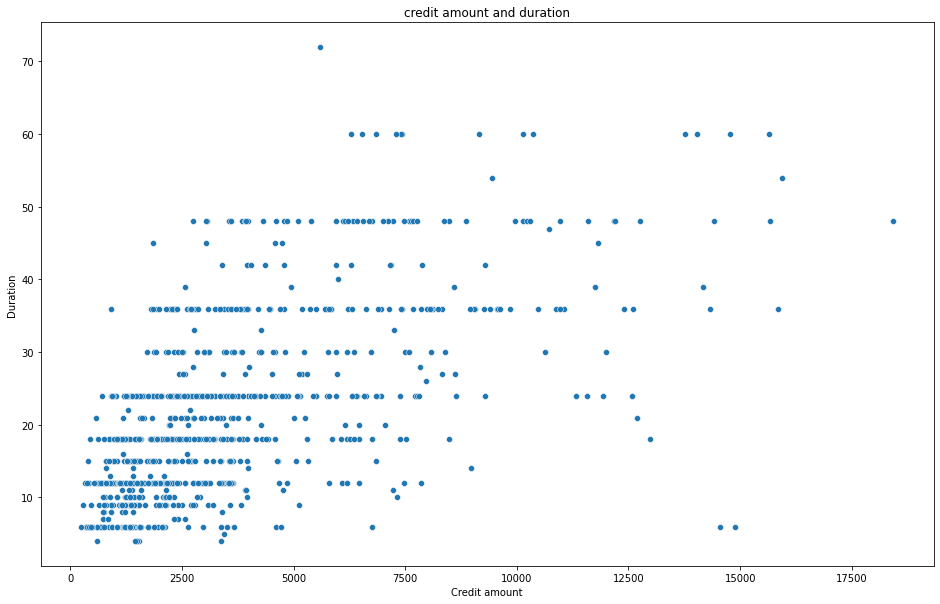

In [45]:
plt.figure(figsize=(16,10))
sns.scatterplot(x="Credit amount", y="Duration", data=df)
plt.title("credit amount and duration")

Observation

---

There is linner correaltion between credit and duration as we see in scatter plot above.

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


<Figure size 1152x720 with 0 Axes>

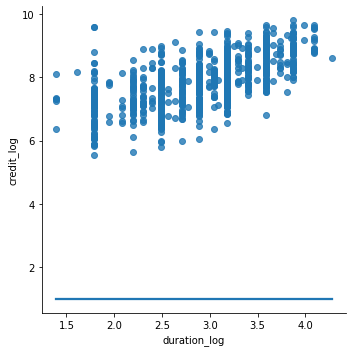

In [46]:
plt.figure(figsize=(16,10))
sns.lmplot(y="credit_log", x="duration_log", data=df,
           logistic=True, y_jitter=.03)

<Figure size 1152x720 with 0 Axes>

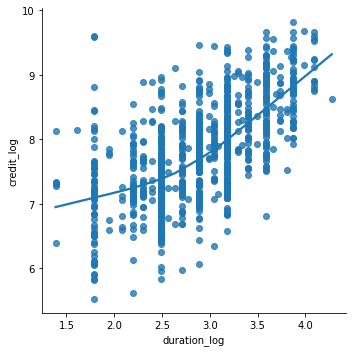

In [47]:
plt.figure(figsize=(16,10))
sns.lmplot(y="credit_log", x="duration_log", data=df,
           lowess=True)

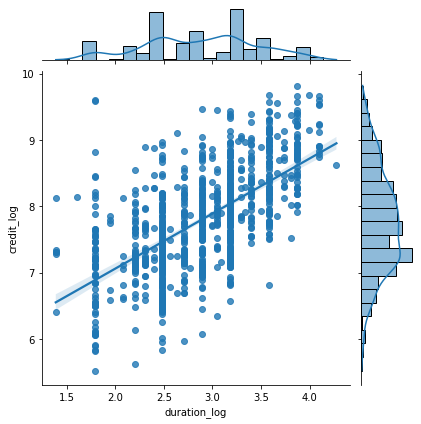

In [48]:
sns.jointplot(y="credit_log", x="duration_log", data=df, kind="reg")

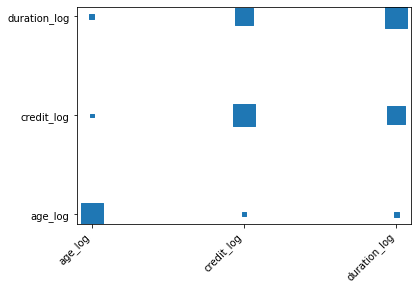

In [ ]:
# Code is taken form other people.
# Step 1 - Make a scatter plot with square markers, set column names as labels

def heatmap(x, y, size):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    

columns = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account','Purpose',
       'age_log', 'credit_log','duration_log'] 
corr = df[columns].corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs()
)


C:\Users\Mohit\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Mohit\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


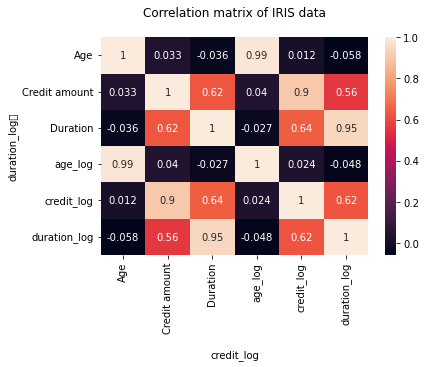

In [ ]:
hm = sns.heatmap(df.corr(), annot = True)

hm.set(xlabel='\ncredit_log', ylabel='duration_log\t', title = "Correlation matrix of IRIS data\n")

plt.show()

Observation

---
There is correaltion between crest and duration.We can use it for futher studies or for featue analysis.


<Figure size 1152x720 with 0 Axes>

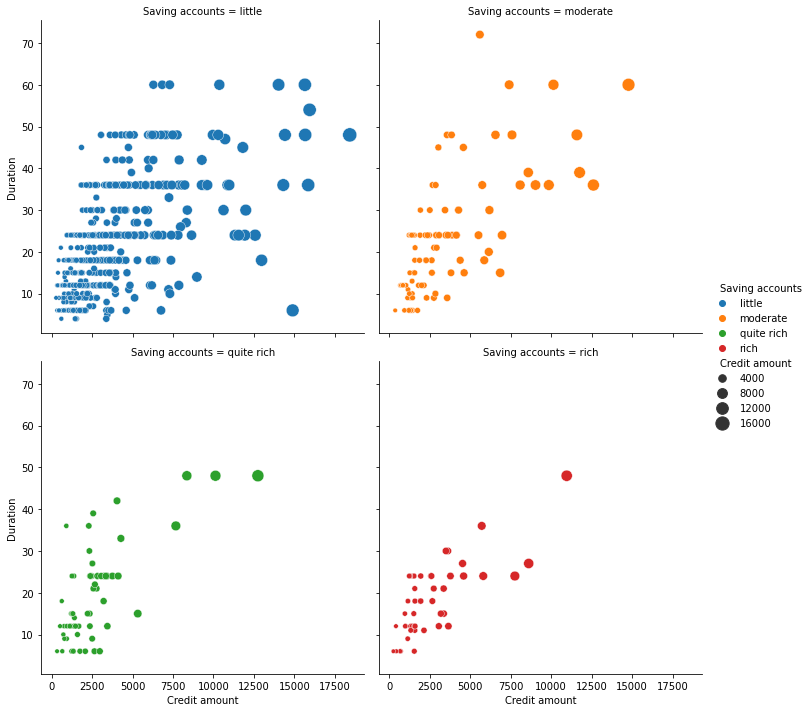

In [ ]:
plt.figure(figsize=(16,10))
sns.relplot(x="Credit amount", y="Duration",col="Saving accounts",col_wrap=2,kind="scatter",hue="Saving accounts",size="Credit amount",sizes=(20, 200),data=df)

<Figure size 1152x720 with 0 Axes>

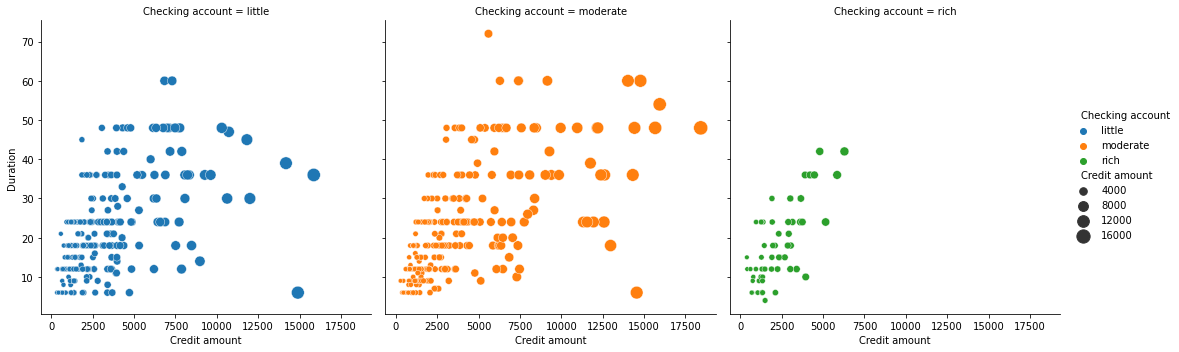

In [ ]:
plt.figure(figsize=(16,10))
sns.relplot(x="Credit amount", y="Duration",col="Checking account", kind="scatter",hue="Checking account",size="Credit amount",sizes=(20, 200), data=df)

Observation

---
1. Rich people are taking very less credit and for less duration as compared to others.
2.Moderate people are taking very High credit and for more duration as compared to others.


<Figure size 1800x1152 with 0 Axes>

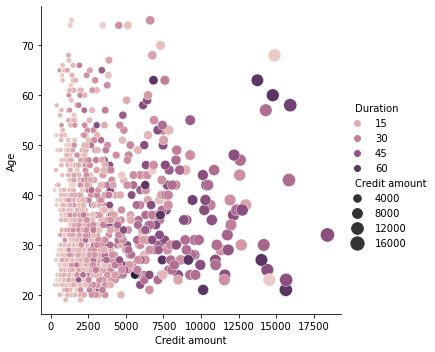

In [ ]:
plt.figure(figsize=(25,16))
sns.relplot(x="Credit amount", y="Age", kind="scatter",hue="Duration",size="Credit amount",sizes=(20, 200), data=df)

<Figure size 1152x720 with 0 Axes>

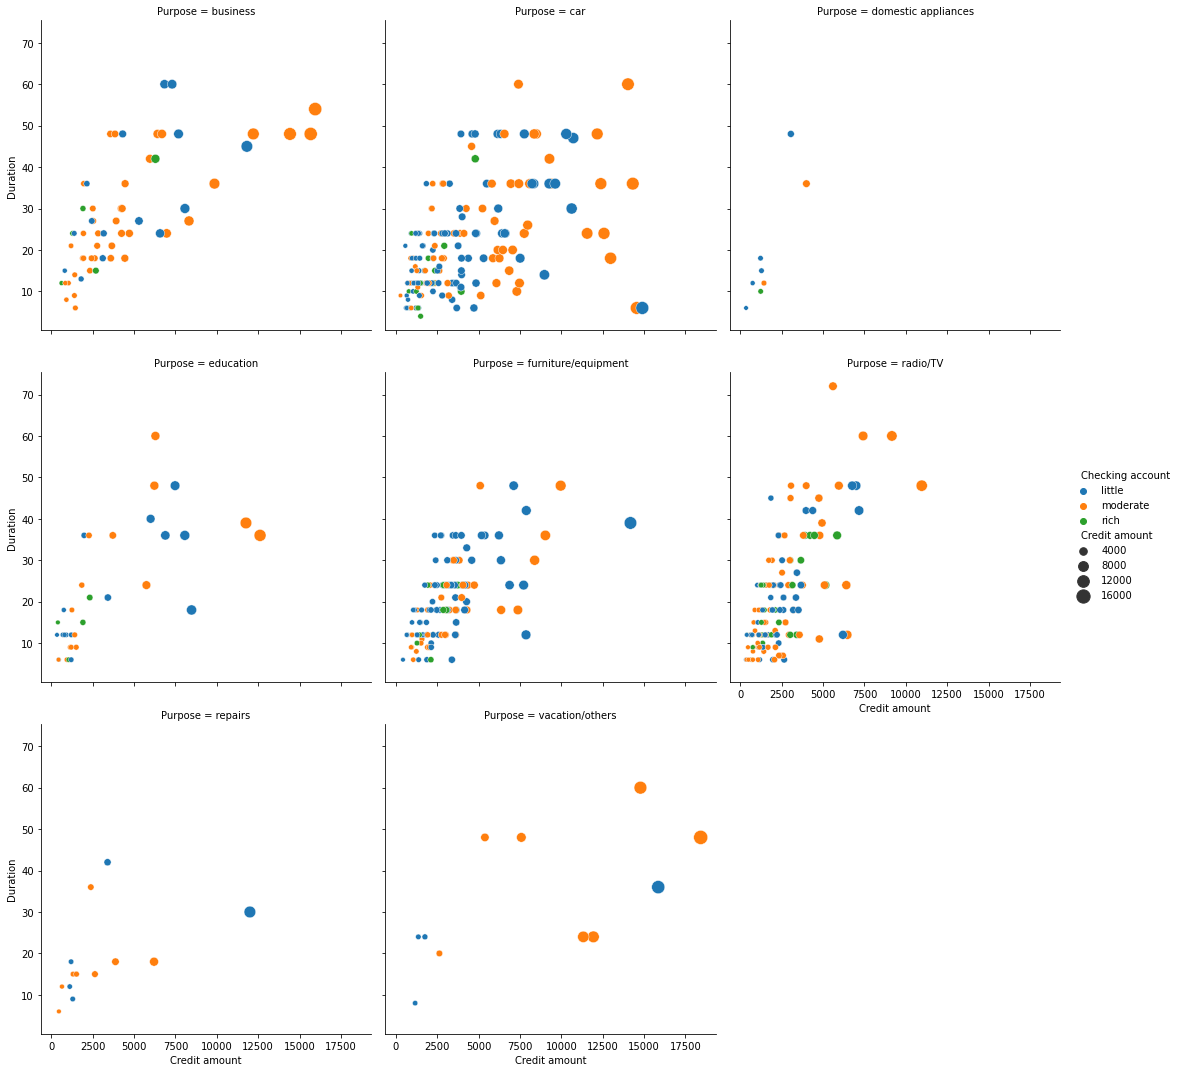

In [ ]:
plt.figure(figsize=(16,10))
sns.relplot(x="Credit amount", y="Duration",col="Purpose",col_wrap=3, 
            kind="scatter",hue="Checking account",size="Credit amount",sizes=(20, 200), data=df)

Observation

---

1. For vacation little category people taking high credit with log duration.
2. for repais credit mostly taken by moderate category people.
3. Rich people taking loan for mostly car , furniture and radio.